### Business Questions
- Is there a difference in the rating between males and females?
- What impact has the customer_type on the rating ?
- What impact has the type of travel on the rating ?
- What impact has the class on the rating ?
- Does the age of a customer effect the rating?
- What feature has most/less impact on the rating?
- Is the rating worse on longer flight distance?
- How does a delay impact the rating?


# TODO


In [75]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
from sys import path
from os.path import abspath

path.insert(0, abspath('../src'))
import mylib.cleaning as clean
import mylib.exploring as explore

In [3]:
pd.options.display.max_columns = None

#### Load config

In [4]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

#### Read cleaned dataset

In [5]:
data = pd.read_csv(config['data']['clean'])
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied
0,70172,M,Loyal,13,Private,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,False
1,5047,M,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,False
2,110028,F,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,True
3,24026,F,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,False
4,119299,M,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,True


#### Select all columns containing a rating (0-5)

In [6]:
rate_cols = ['inflight_wifi_service', 'departure_arrival_time_convenient',
             'ease_of_online_booking', 'gate_location', 'food_and_drink',
             'online_boarding', 'seat_comfort', 'inflight_entertainment',
             'on_board_service', 'leg_room_service', 'baggage_handling',
             'checkin_service', 'inflight_service', 'cleanliness']

### Prepare dataset for exploration
Before deeper exploring the dataset, let's add some useful columns...

#### Create column 'rating_sum' with the sum of all ratings of a certain passenger

In [7]:
data['rating_avg'] = data[rate_cols].mean(axis=1)

#### Create column 'flight_distance_class' from column 'flight_distance'
<pre>
  0-1000km    => 'short'
  1000-3000km => 'medium'
  >3000km     => 'long'
</pre>

In [8]:
def get_flight_distance_class(val):
    if val < 1000:
        return "short"
    elif val < 3000:
        return "medium"
    else:
        return "long"

In [9]:
data['flight_distance_class'] = data['flight_distance'].apply(get_flight_distance_class)

#### Create column 'generation' from column 'age'
<pre>
  <13 years   => 'Kid'
  13-19 years => 'Teenager'
  20-64 years => 'Adult'
  >64 years   => 'Retiree'
</pre>

In [10]:
def get_generation(val):
    if val < 13:
        return "Kid"
    elif val < 20:
        return "Teenager"
    elif val < 65:
        return "Adult"
    else:
        return "Retiree"

In [11]:
data['generation'] = data['age'].apply(get_generation)

In [12]:
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied,rating_avg,flight_distance_class,generation
0,70172,M,Loyal,13,Private,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,False,3.857143,short,Teenager
1,5047,M,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,False,2.285714,short,Adult
2,110028,F,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,True,3.714286,medium,Adult
3,24026,F,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,False,3.000000,short,Adult
4,119299,M,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,True,3.500000,short,Adult


In [13]:
explore.print_unique(data)

COLUMN id (int64)
[ 70172   5047 110028  24026 119299 111157  82113  96462  79485  65725
  34991  51412  98628  83502  95789 100580  71142 127461  70354  66246]...

COLUMN gender (object)
['M' 'F']

COLUMN customer_type (object)
['Loyal' 'Disloyal']

COLUMN age (int64)
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57]...

COLUMN type_of_travel (object)
['Private' 'Business']

COLUMN class (object)
['Eco Plus' 'Business' 'Eco']

COLUMN flight_distance (int64)
[ 460  235 1142  562  214 1180 1276 2035  853 1061 1182  308  834  946
  453  486 2123 2075 2486 1174]...

COLUMN inflight_wifi_service (int64)
[3 2 4 1 5 0]

COLUMN departure_arrival_time_convenient (int64)
[4 2 5 3 1 0]

COLUMN ease_of_online_booking (int64)
[3 2 5 4 1 0]

COLUMN gate_location (int64)
[1 3 2 5 4 0]

COLUMN food_and_drink (int64)
[5 1 2 4 3 0]

COLUMN online_boarding (int64)
[3 5 2 1 4 0]

COLUMN seat_comfort (int64)
[5 1 2 3 4 0]

COLUMN inflight_entertainment (int64)
[5 1 2 3 4 0]

COLUMN on_board_se

#### Explore distribution of categoricals

In [42]:
def plot_amount(data, h, w, fig_h=5, fig_w=5, hue=None):
    fig,ax = plt.subplots(h,w, figsize=(fig_w, fig_h))
    coli=0

    for y in range(h):
        for x in range(w):
            sx = sns.countplot(x=data[data.columns[coli]], ax=ax[y,x], hue=hue)
            sx.set(ylabel='', xlabel='', title=data.columns[coli])
            sx.grid(axis='y')
            coli += 1

    plt.tight_layout()
    plt.show()

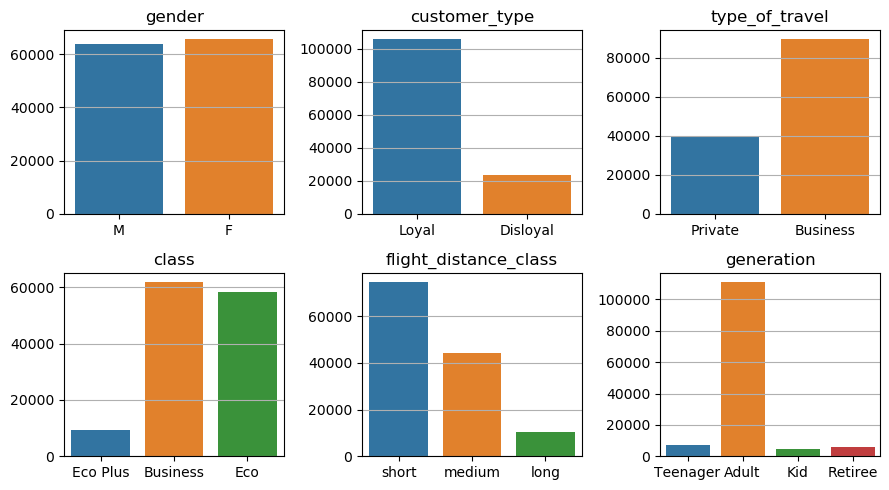

In [43]:
plot_amount(data.select_dtypes(object), 2, 3, 5, 9)

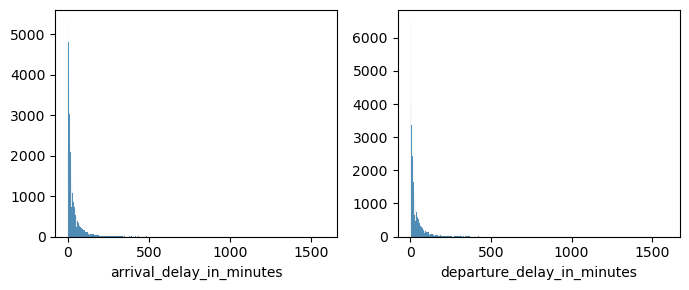

In [16]:
x1=data[data['arrival_delay_in_minutes']>0]['arrival_delay_in_minutes']
x2=data[data['departure_delay_in_minutes']>0]['departure_delay_in_minutes']

fig,ax = plt.subplots(1,2, figsize=(7,3))
sns.histplot(x=x1, ax=ax[0]).set(ylabel='')
sns.histplot(x=x2, ax=ax[1]).set(ylabel='')
plt.tight_layout()
plt.show()

In [101]:
grp = data.pivot_table(index='class', values='rating_avg').reset_index()
px.bar(y=grp['rating_avg'], x=grp['class'], color=grp['class'],
       title='Rating by Class',
       labels={
           'y': 'Average Rating',
           'x': 'Class'},
      color_discrete_map={'Business':'#bb99ff', 'Eco':'#7733ff', 'Eco Plus':'#4400cc'}
)

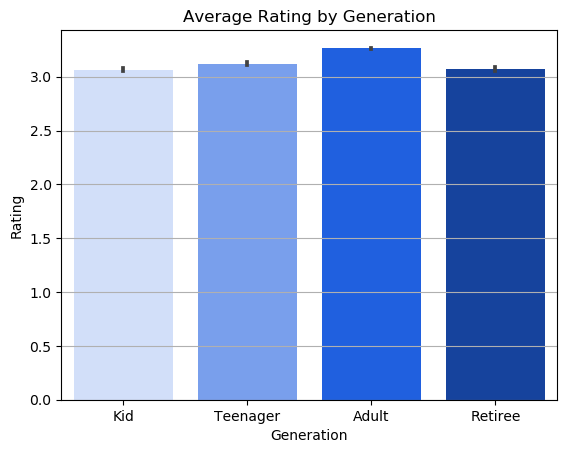

In [44]:
order = ['Kid', 'Teenager', 'Adult', 'Retiree']
palette = ['#ccddff', '#6699ff', '#0055ff', '#003cb3']
sx = sns.barplot(x='generation', y='rating_avg', data=data, palette=palette, order=order)
sx.grid(axis='y')
sx.set(title='Average Rating by Generation', ylabel='Rating', xlabel='Generation')
plt.show()

In [129]:
grp = data.pivot_table(index='generation', values='rating_avg').reset_index()
px.bar(grp, y='rating_avg', x='generation', color='generation',
       title='Rating by Generation',
       labels={'rating_avg': 'Average Rating', 'generation': 'Generation'},
       color_discrete_map={'Kid':'#ccddff', 'Teenager':'#6699ff', 'Adult':'#0055ff', 'Retiree':'#003cb3'},
       category_orders = {'generation': ['Kid', 'Teenager', 'Adult', 'Retiree']},
)

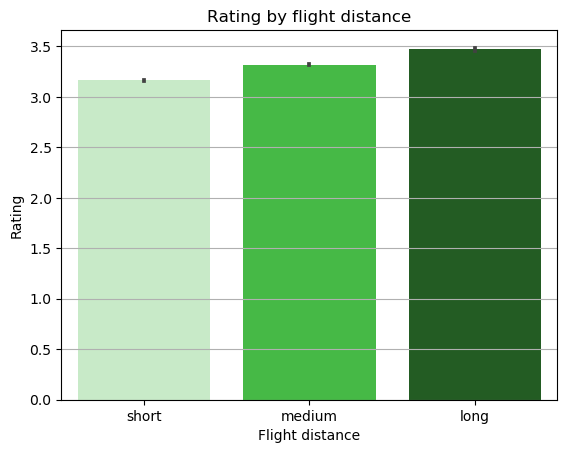

In [90]:
palette = ['#c2f0c2', '#33cc33', '#196619']
sx = sns.barplot(x='flight_distance_class', y='rating_avg', data=data, palette=palette)
sx.grid(axis='y')
sx.set(title='Rating by flight distance', ylabel='Rating', xlabel='Flight distance')
plt.show()

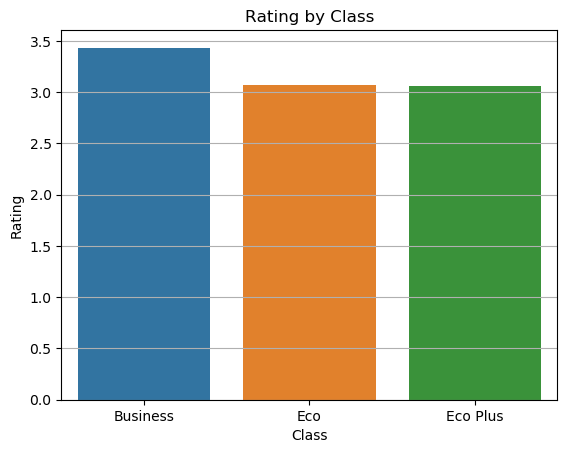

In [66]:
grp = data.pivot_table(index='class', values='rating_avg').reset_index()
sx = sns.barplot(x=grp['class'], y=grp['rating_avg'])
sx.set(title='Rating by Class', ylabel='Rating', xlabel='Class')
sx.grid(axis='y')
plt.show()

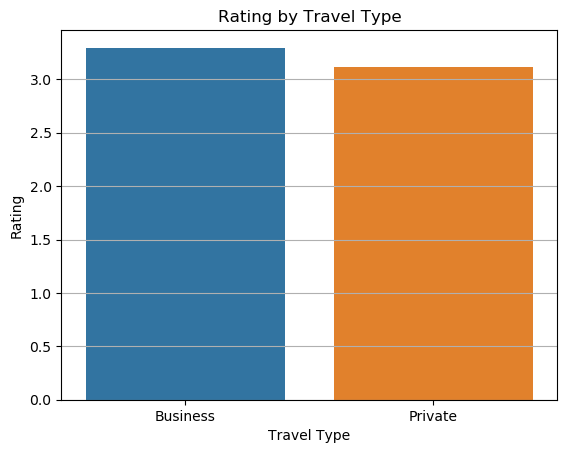

In [91]:
grp = data.pivot_table(index='type_of_travel', values='rating_avg').reset_index()
sx = sns.barplot(x=grp['type_of_travel'], y=grp['rating_avg'])
sx.set(title='Rating by Travel Type', ylabel='Rating', xlabel='Travel Type')
sx.grid(axis='y')
plt.show()

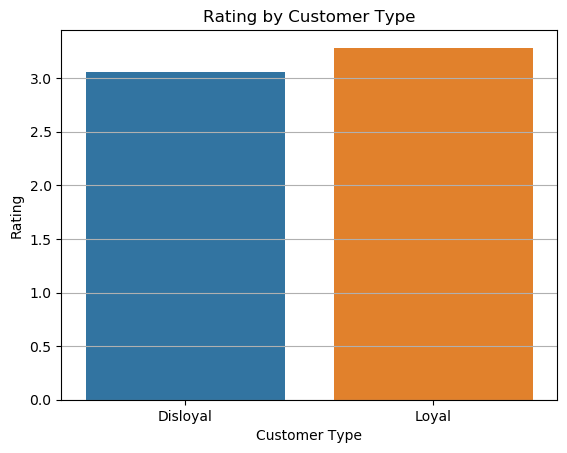

In [92]:
grp = data.pivot_table(index='customer_type', values='rating_avg').reset_index()
sx = sns.barplot(x=grp['customer_type'], y=grp['rating_avg'])
sx.set(title='Rating by Customer Type', ylabel='Rating', xlabel='Customer Type')
sx.grid(axis='y')
plt.show()

/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[

/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/peilnix/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[

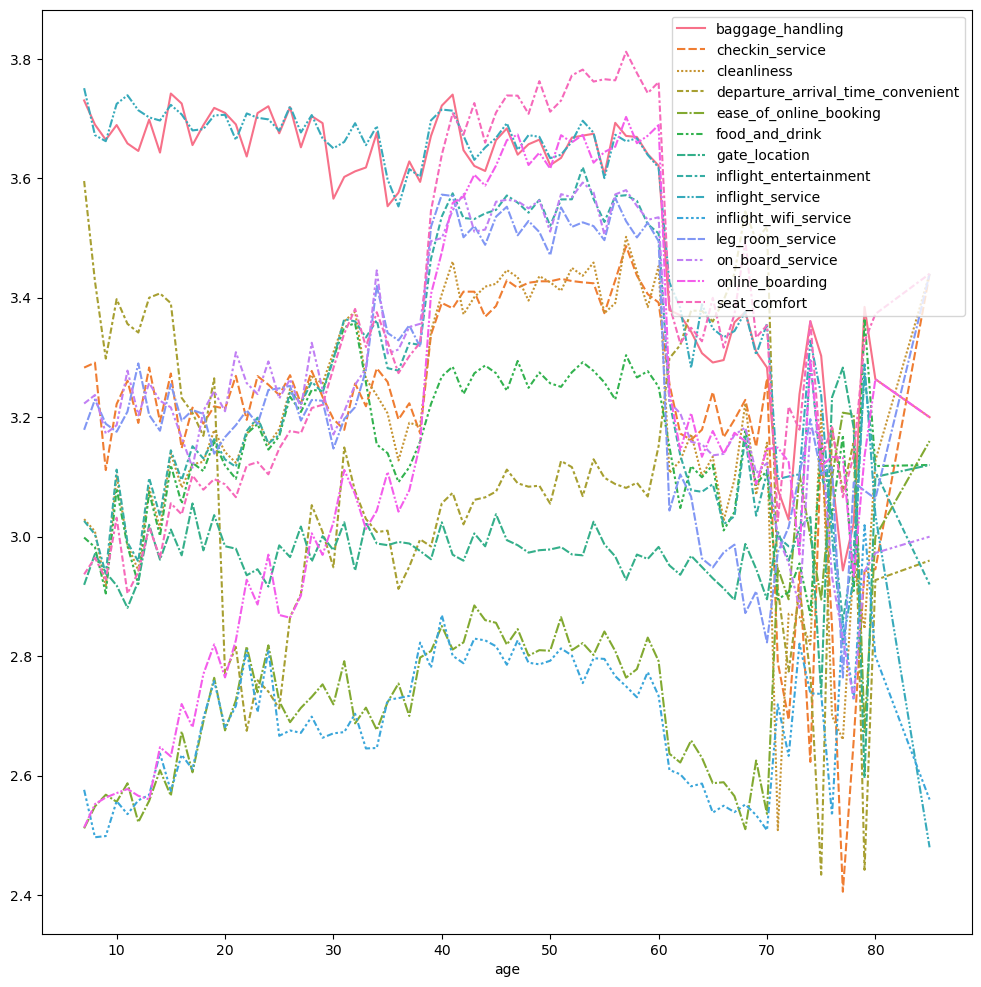

In [19]:
# Check rating score by different age
grp = data.pivot_table(index='age', values=rate_cols)
grp
fig,ax = plt.subplots(figsize=(12,12))
sx = sns.lineplot(data=grp) #, x='age', y=grp['inflight_entertainment','inflight_wifi_service'])
#sx = sns.lineplot(y=grp['inflight_entertainment'], x=grp['age'])
#sx = sns.lineplot(y=grp['inflight_wifi_service'], x=grp['age'])
plt.show()
#sx.set(title='Rating by Age', ylabel='Rating', xlabel='Age')

#### Explore ratings
All ratings are ranged from 0 to 5
- inflight_wifi_service
- departure_arrival_time_convenient
- ease_of_online_booking
- gate_location
- food_and_drink
- online_boarding
- seat_comfort
- inflight_entertainment
- on_board_service
- leg_room_service
- baggage_handling
- checkin_service
- inflight_service
- cleanliness

In [20]:
def get_balanced_data(data, column):
    '''
    Get a dataframe where the unique values of the given column
    are well balanced.
    
    Args:
        data: The dataset
        column: The column to balance
    Return:
        Balanced dataset        
    '''
    
    if data[column].dtype != object:
        raise Exception('categorical column required')
    
    balanced = pd.DataFrame()
    nrows = min(data[column].value_counts())
    
    for val in data[column].value_counts().keys():
        chunk = data[data[column] == val].iloc[:nrows,:].reset_index(drop=True)
        balanced = pd.concat([balanced, chunk], axis=0)

    return balanced

### Check ratings by gender

In [21]:
rate_cols = ['inflight_wifi_service', 'departure_arrival_time_convenient',
             'ease_of_online_booking', 'gate_location', 'food_and_drink',
             'online_boarding', 'seat_comfort', 'inflight_entertainment',
             'on_board_service', 'leg_room_service', 'baggage_handling',
             'checkin_service', 'inflight_service', 'cleanliness']

In [22]:
d = pd.concat([data[data['gender']=='M'].iloc[:10000,:].reset_index(),
               data[data['gender']=='F'].iloc[:10000,:].reset_index()], axis=0)

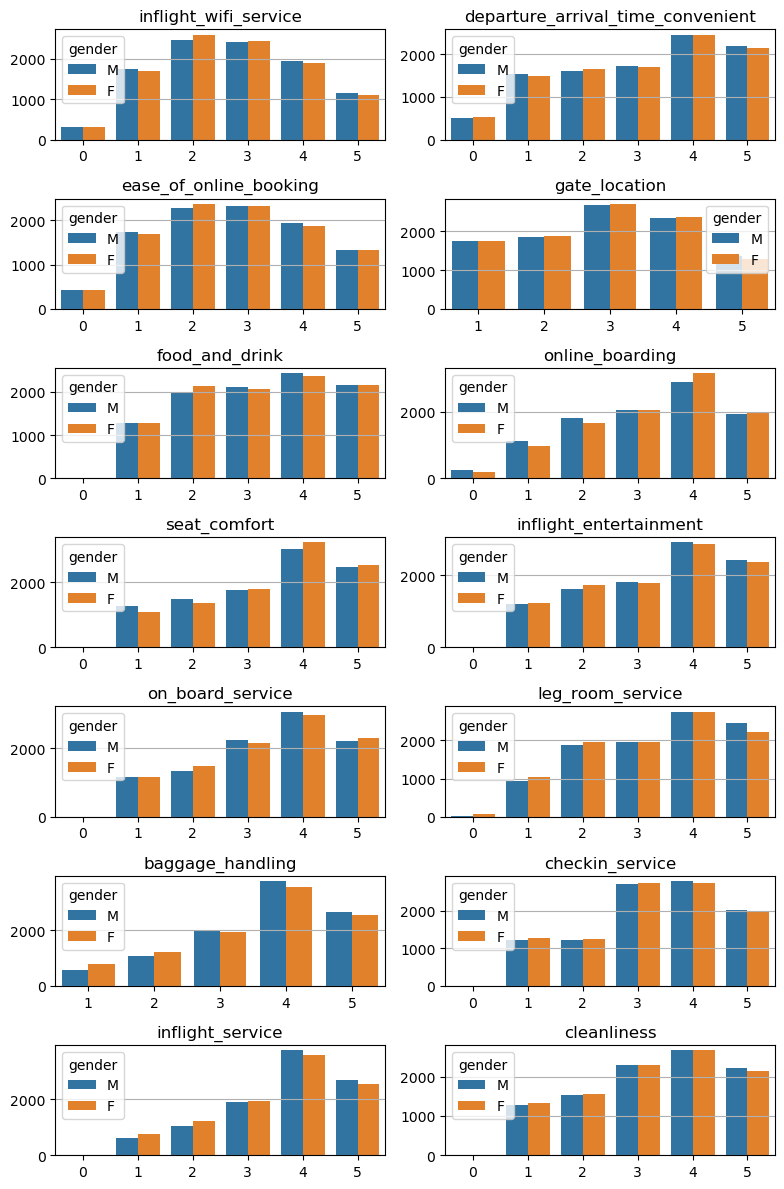

In [23]:
plot_amount(d[rate_cols], 7, 2, 12, 8, d['gender'])

### Check data by travel type

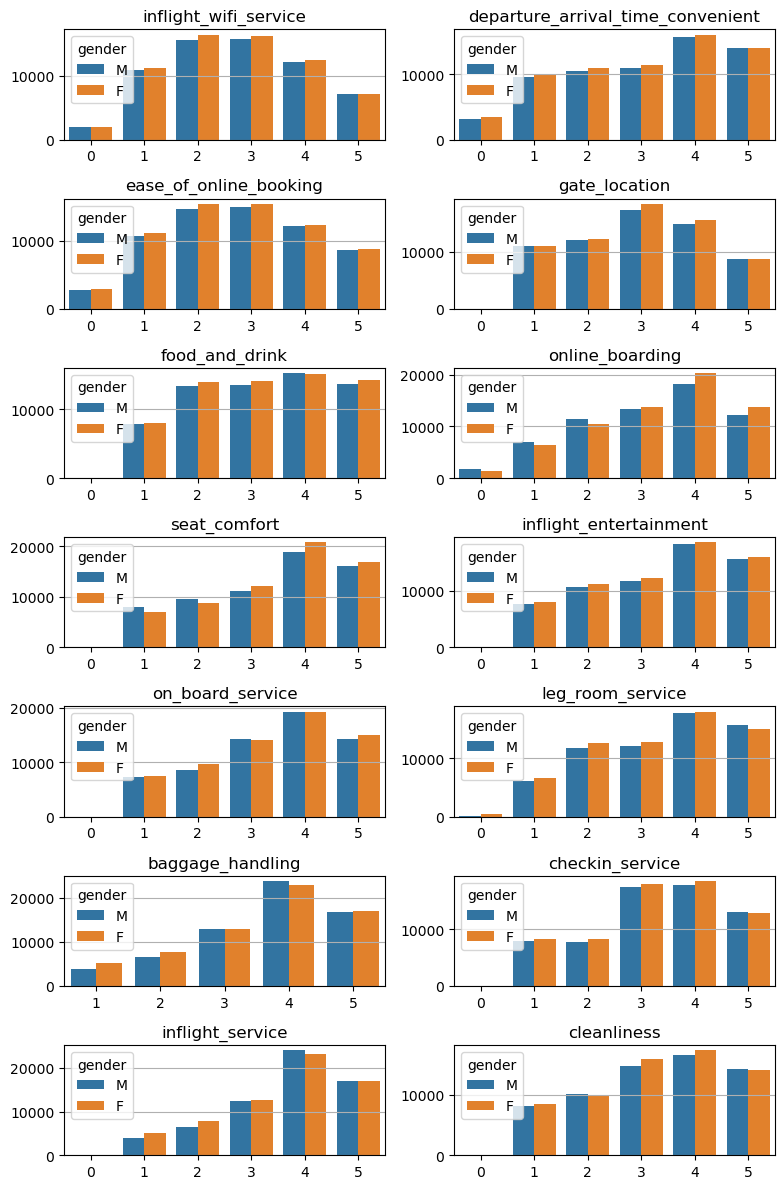

In [24]:
plot_amount(data[rate_cols], 7, 2, 12, 8, data['gender'])

In [25]:
grp = data.pivot_table(index='type_of_travel', values=rate_cols)
grp

,baggage_handling,checkin_service,cleanliness,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,gate_location,inflight_entertainment,inflight_service,inflight_wifi_service,leg_room_service,on_board_service,online_boarding,seat_comfort
type_of_travel,,,,,,,,,,,,,,
Business,3.657879,3.292235,3.360277,2.794600,2.882352,3.265839,3.002471,3.494382,3.660808,2.822438,3.473956,3.434613,3.454950,3.554039
Private,3.573822,3.337521,3.120798,3.644274,2.476300,3.068079,2.919809,3.053569,3.601194,2.518805,3.076595,3.268368,2.800984,3.190400


In [26]:
g = data.groupby('gender').agg({'ease_of_online_booking':'median'})
g

,ease_of_online_booking
gender,
F,3.0
M,3.0


#### Explore by gender
Let's see if there are differences between Males and Females

In [27]:
grp = data.groupby('gender').agg({'flight_distance':'mean', 'age':'mean'})
grp

,flight_distance,age
gender,,
F,1186.440269,39.294948
M,1194.094491,39.566600


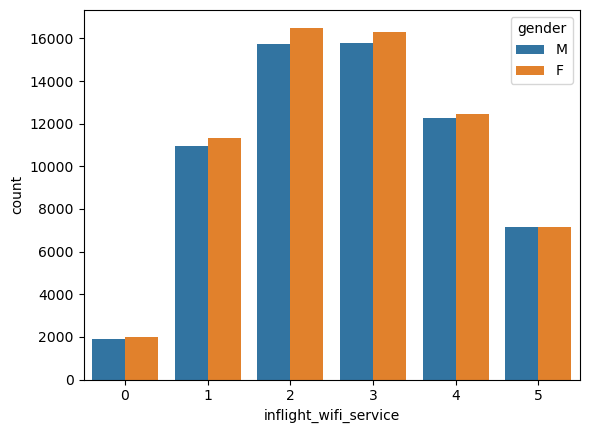

In [28]:
sns.countplot(x=data['inflight_wifi_service'], hue=data['gender'])

In [29]:
data['age'].min()

7

In [30]:
data['id'].min()

1

In [31]:
data['id'].max()

129880